In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv('/content/drive/MyDrive/weather-automated-sensors-dataset.csv')


In [38]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                 Station Name   Measurement Timestamp  Air Temperature  \
0  Oak Street Weather Station  05/22/2015 03:00:00 PM              NaN   
1  Oak Street Weather Station  05/22/2015 05:00:00 PM              NaN   
2  Oak Street Weather Station  05/22/2015 06:00:00 PM              NaN   
3  Oak Street Weather Station  05/22/2015 07:00:00 PM              NaN   
4  Oak Street Weather Station  05/22/2015 08:00:00 PM              NaN   

   Wet Bulb Temperature  Humidity  Rain Intensity  Interval Rain  Total Rain  \
0                   7.0      55.0             0.0            0.0         1.4   
1                   6.3      56.0             0.0            0.0         1.4   
2                   6.5      54.0             0.0            0.0         1.4   
3                   6.3      53.0             0.0            0.0         1.4   
4                   6.4      52.0             0.0            0.0         1.4   

   Precipitation Type  Wind Direction  Wind

In [39]:
print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
       Air Temperature  Wet Bulb Temperature      Humidity  Rain Intensity  \
count     59066.000000          38843.000000  59141.000000    38843.000000   
mean         13.282062             10.643001     69.464517        0.187591   
std           9.945331              8.965170     15.714691        1.962149   
min         -19.890000            -20.100000     17.000000        0.000000   
25%           5.500000              4.000000     59.000000        0.000000   
50%          14.900000             12.100000     71.000000        0.000000   
75%          21.500000             18.100000     82.000000        0.000000   
max          34.100000             28.400000    100.000000      183.600000   

       Interval Rain    Total Rain  Precipitation Type  Wind Direction  \
count   59141.000000  38843.000000        38843.000000    59141.000000   
mean        0.175327    185.445529            4.651932      178.980132   
std         1.300946    231.579782           16.16854

In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59144 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59066 non-null  float64
 3   Wet Bulb Temperature         38843 non-null  float64
 4   Humidity                     59141 non-null  float64
 5   Rain Intensity               38843 non-null  float64
 6   Interval Rain                59141 non-null  float64
 7   Total Rain                   38843 non-null  float64
 8   Precipitation Type           38843 non-null  float64
 9   Wind Direction               59141 non-null  float64
 10  Wind Speed                   59141 non-null  float64
 11  Maximum Wind Speed           59141 non-null  float64
 12  Barometric Pressure          58995 non-null  float64
 13  Solar Radiation 

In [41]:
print("\nColumns and Data Types:")
print(data.dtypes)


Columns and Data Types:
Station Name                    object
Measurement Timestamp           object
Air Temperature                float64
Wet Bulb Temperature           float64
Humidity                       float64
Rain Intensity                 float64
Interval Rain                  float64
Total Rain                     float64
Precipitation Type             float64
Wind Direction                 float64
Wind Speed                     float64
Maximum Wind Speed             float64
Barometric Pressure            float64
Solar Radiation                float64
Heading                        float64
Battery Life                   float64
Measurement Timestamp Label     object
Measurement ID                  object
dtype: object


In [42]:
data = data.drop(columns=['Station Name', 'Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID'])
print("\nData after dropping irrelevant columns:")
print(data.head())


Data after dropping irrelevant columns:
   Air Temperature  Wet Bulb Temperature  Humidity  Rain Intensity  \
0              NaN                   7.0      55.0             0.0   
1              NaN                   6.3      56.0             0.0   
2              NaN                   6.5      54.0             0.0   
3              NaN                   6.3      53.0             0.0   
4              NaN                   6.4      52.0             0.0   

   Interval Rain  Total Rain  Precipitation Type  Wind Direction  Wind Speed  \
0            0.0         1.4                 0.0            63.0         1.9   
1            0.0         1.4                 0.0           124.0         1.5   
2            0.0         1.4                 0.0           156.0         1.9   
3            0.0         1.4                 0.0           150.0         1.4   
4            0.0         1.4                 0.0           155.0         1.1   

   Maximum Wind Speed  Barometric Pressure  Solar Radiati

In [43]:
print("\nMissing Values Count:")
print(data.isnull().sum())



Missing Values Count:
Air Temperature            78
Wet Bulb Temperature    20301
Humidity                    3
Rain Intensity          20301
Interval Rain               3
Total Rain              20301
Precipitation Type      20301
Wind Direction              3
Wind Speed                  3
Maximum Wind Speed          3
Barometric Pressure       149
Solar Radiation             3
Heading                 20301
Battery Life                3
dtype: int64


In [44]:
data = data.dropna()
print("\nData after dropping missing values:")
print(data.isnull().sum())


Data after dropping missing values:
Air Temperature         0
Wet Bulb Temperature    0
Humidity                0
Rain Intensity          0
Interval Rain           0
Total Rain              0
Precipitation Type      0
Wind Direction          0
Wind Speed              0
Maximum Wind Speed      0
Barometric Pressure     0
Solar Radiation         0
Heading                 0
Battery Life            0
dtype: int64


In [45]:
print("\nData shape after dropping values:")
print(data.shape)


Data shape after dropping values:
(38768, 14)


In [46]:
features = data.drop(columns=['Air Temperature'])
target = data['Air Temperature']

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

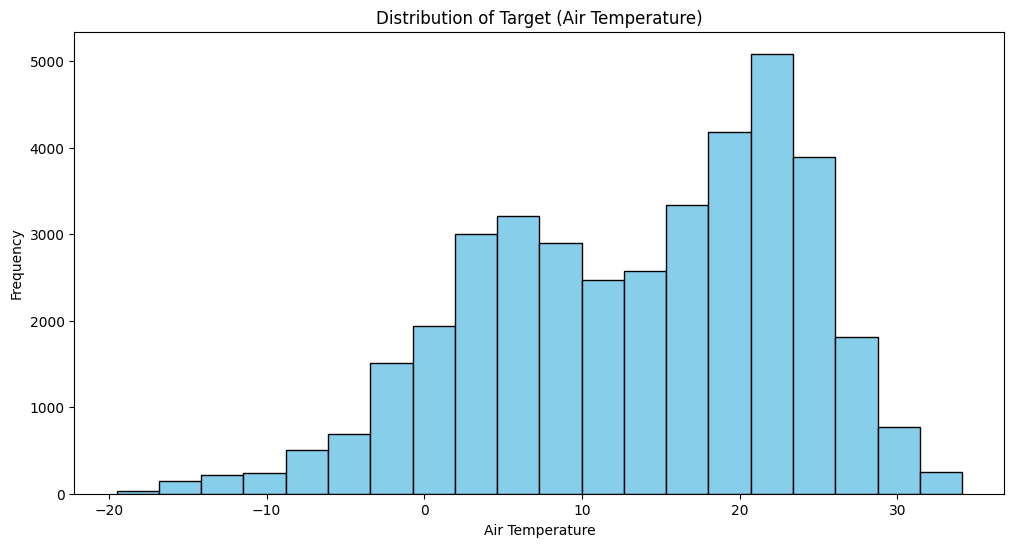

In [48]:
plt.figure(figsize=(12, 6))
plt.hist(target, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Target (Air Temperature)')
plt.xlabel('Air Temperature')
plt.ylabel('Frequency')
plt.show()

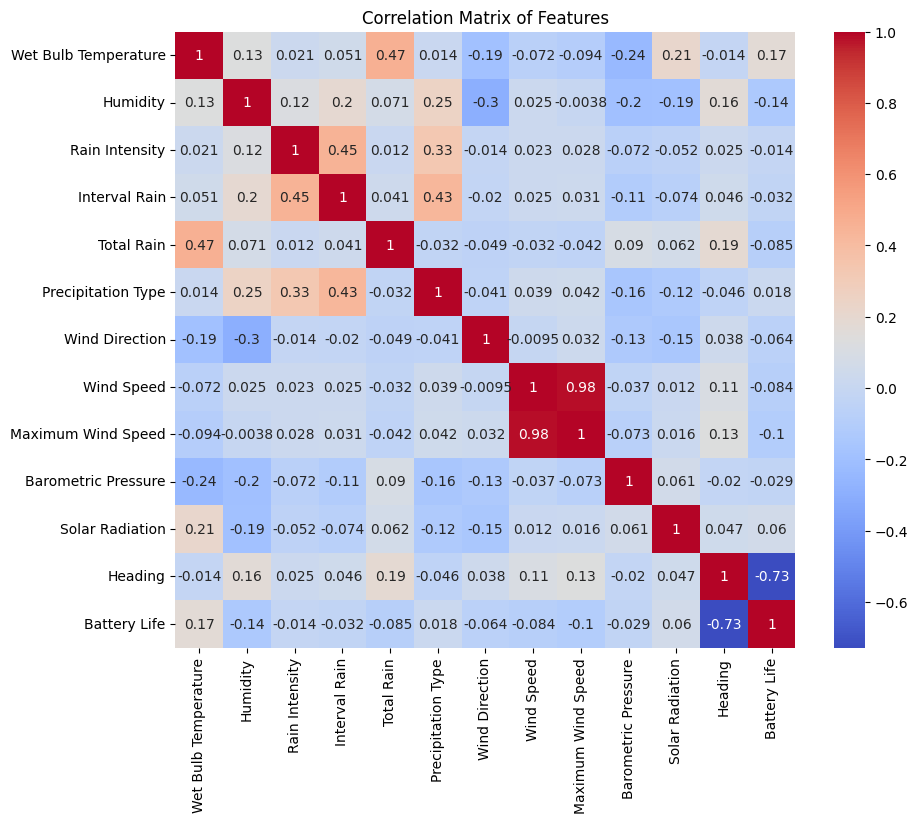

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
print("\nTraining data (scaled) stats - mean and std dev per feature:")
print("Mean:", np.mean(X_train_scaled, axis=0))
print("Std Dev:", np.std(X_train_scaled, axis=0))


Training data (scaled) stats - mean and std dev per feature:
Mean: [-6.36908753e-17 -2.64844071e-16 -3.41364763e-17 -4.35297349e-18
 -1.20966842e-16  3.16163338e-17 -1.09053441e-16  2.31394907e-17
 -2.31394907e-17  2.28187452e-16  6.59819139e-17 -7.60624841e-17
 -2.41933684e-16]
Std Dev: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [54]:
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
print("\nDNN Model Summary:")
dnn_model.summary()


DNN Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 55.5079 - mae: 4.0858 - val_loss: 0.3159 - val_mae: 0.3863
Epoch 2/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9993 - mae: 0.4206 - val_loss: 0.2444 - val_mae: 0.2933
Epoch 3/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.2586 - mae: 0.3665 - val_loss: 3.9765 - val_mae: 1.1796
Epoch 4/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.6058 - mae: 0.5896 - val_loss: 0.1178 - val_mae: 0.2328
Epoch 5/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0966 - mae: 0.2006 - val_loss: 0.0687 - val_mae: 0.1891
Epoch 6/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0759 - mae: 0.1775 - val_loss: 0.0647 - val_mae: 0.1809
Epoch 7/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1739 - mae: 0.1752 - val_loss: 0.1053 - val_mae: 0.1566
Epoch 8/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1254 - mae: 0.1645 - val_loss: 0.0449 - val_mae: 0.1400
Epoch 9/50
776/776 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - l

In [56]:
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

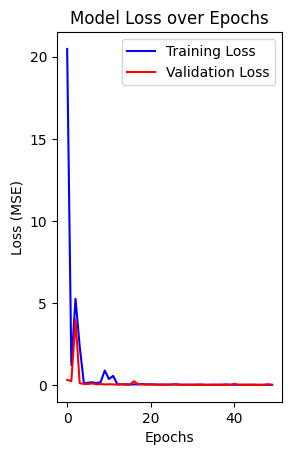

In [57]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Model Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()

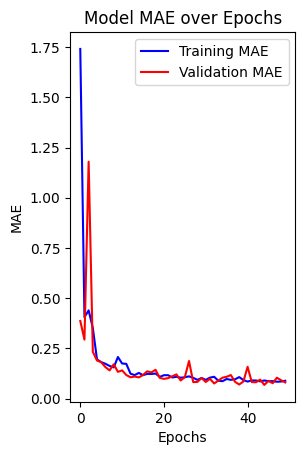

In [58]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title("Model MAE over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()

plt.show()

In [59]:
y_pred = dnn_model.predict(X_test_scaled).flatten()


243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")


Evaluation Metrics:
Mean Squared Error (MSE): 0.0121
R^2 Score: 0.9999
Root Mean Squared Error (RMSE): 0.1100
Mean Absolute Error (MAE): 0.0813
Mean Absolute Percentage Error (MAPE): inf
Explained Variance Score: 0.9999


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
accuracy_within_2_deg = np.mean(np.abs(y_pred - y_test) <= 2) * 100
print(f"Accuracy within ±2°C: {accuracy_within_2_deg:.2f}%")

Accuracy within ±2°C: 99.99%


Text(0, 0.5, 'Predicted Air Temperature')

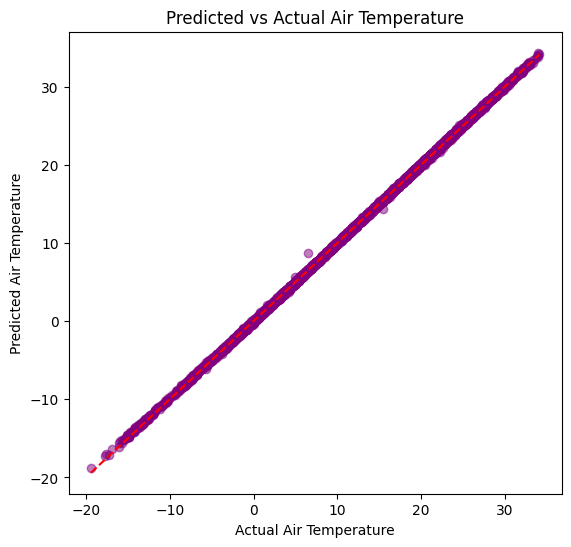

In [63]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title("Predicted vs Actual Air Temperature")
plt.xlabel("Actual Air Temperature")
plt.ylabel("Predicted Air Temperature")

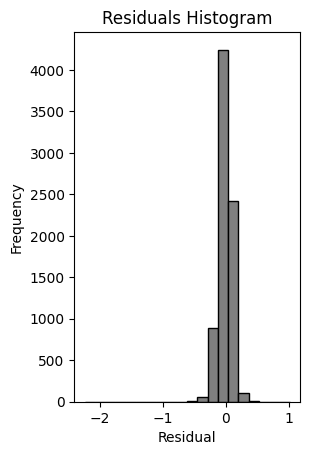

In [64]:
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.show()

In [65]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nFirst few predictions vs actual values:")
print(results_df.head(100))


First few predictions vs actual values:
       Actual  Predicted
34979     3.9   3.718638
1041     14.5  14.464941
38420     5.8   5.737875
47717    17.1  17.037996
19066     3.2   3.105386
...       ...        ...
14870     8.7   8.632547
8048     14.7  14.653769
25539    24.8  24.775997
9519     13.3  13.346420
37678     4.4   4.478283

[100 rows x 2 columns]
